### 지도학습 분류 미리보기

In [27]:
# pip install scikit-learn

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font) #폰트 설정 변경
# plt.rcParams['axes.unicode_minus']=False #마이너스 기호 깨질 때

### 생선 이진 분류
이진 분류: 0 또는 1로 구분 -> 도미면 1, 도미가 아니면 0

1. 생선 구분 없이 [길이, 무게] 정보를 합침 (2차원 배열)
    -> 훈련 입력 데이터 생성

In [29]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

len(bream_weight)

35

In [30]:

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

len(smelt_length)

14

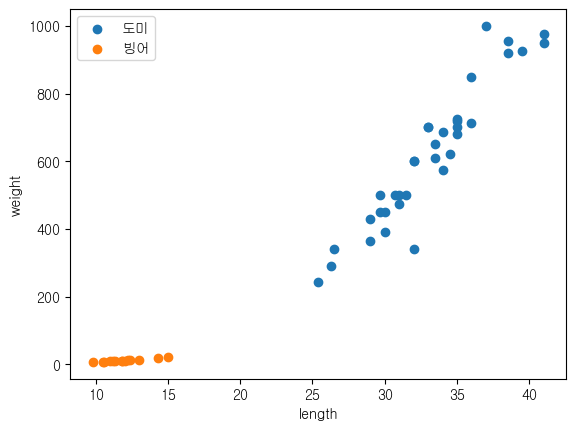

In [31]:
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()

plt.show()

In [32]:
# 데이터 전처리
# 모델이 원하는 형태로 데이터 가공
# -- 입력(특성): [길이, 무게] 2차원 배열
# -- 결과(정답): 특성에 따라 도미 또는 빙어 분류 -> 1, 0으로 구성된 1차원 배열

fish_length = bream_length+smelt_length
fish_weight = bream_weight+smelt_weight
# 물고기의 길이와 무게 특성을 한꺼번에 모델에 줘야하므로, 물고기부터 합쳐줌

 #훈련 입력 데이터
train_input = []
for l, w in zip(fish_length, fish_weight):
    train_input.append([l, w])
train_input
# 길이와 무게도 병렬로(2차원으로) 묶어줌. zip()이 가능케 함


#훈련 정답 데이터
train_label = [1]*len(bream_length) + [0]*len(smelt_length)
# 도미 데이터 개수만큼 1, 나머지 0


In [33]:
## k-최근접 이웃 분류 모델
# 작동원리: 주어진 데이터가 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측.
#          따라서 최근접 이웃 모델의 훈련은 별도의 연산 없이
#           모델이 데이터를 로드하면 끝남

from sklearn.neighbors import KNeighborsClassifier

In [34]:
kn = KNeighborsClassifier()
# 모델 객체 생성

# 훈련/학습(fit) -> 평가(score) -> 예측(predict) 순서
kn.fit(train_input, train_label)
# 훈련 시킬 입력 데이터, 정답 데이터 순서대로 집어넣음

kn.score(train_input, train_label)
# 평가할 데이터 필요
# 1이면 100점 or 100%

kn.predict([[30, 500], [10, 5]])  #2차원 배열 입력 필요
# 결과: ([1, 0]) -> 각각 도미, 빙어라 예측함

array([1, 0])

In [35]:
distances, index = kn.kneighbors([[30, 500]])
# 이 위치와 제일 가까이에 있는 상위 다섯 개(기본)와의 거리 계산
# distances: 모델 데이터포인트와의 거리(유클리드 거리 측정 방식)
# 상위 다섯 개의 인덱스 번호도 같이 반환
# index: 모델 데이터포인트의 인덱스

print(distances, index)

print(np.array(train_input)[index])
print(np.array(train_label)[index]) # 모두 0. 즉, 다섯 개의 값이 다 빙어임

[[ 0.3         0.7         1.          1.5        25.01999201]] [[ 6  9 11 12 10]]
[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
[[1 1 1 1 1]]


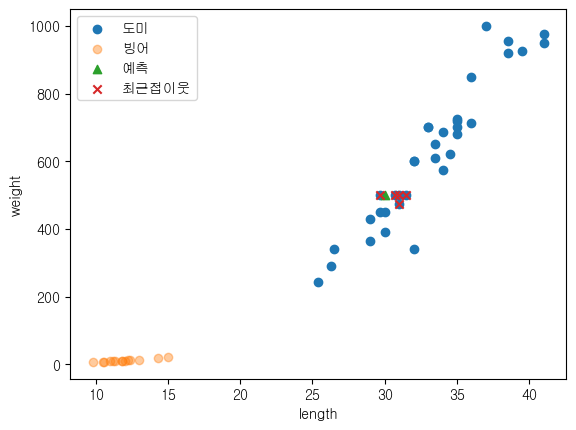

In [36]:
train_input = np.array(train_input)
#ndarray형으로 변경

plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어', alpha=.4)
plt.scatter(30, 500, label='예측', marker='^')
#                               포인트를 삼각형으로 표시
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접이웃', marker='x')
#           index번째 행의 0열: 길이, index번째 행의 1열: 무게
#               -> 팬시 인덱싱이므로 for문 안 써도 다섯 개 잘 불러옴
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()

plt.show()

In [37]:
# k 개수 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label)
# 0.71428... 정답률 약 71점으로 성능이 떨어짐 -> why??
#   35/49와 같은 값. k=49(전체)로 하다보니 어떤 점이든 이웃된 점이 전체임.
#   -> 전체 중 35개가 도미이므로, 과반값으로 결론을 내는 모델이기 때문에
#                                    어떤 점이든 도미라는 예측을 냄
#   -> 따라서 score()에 넣은 14개의 빙어 위치는 오답, 정답률은 35/49

# 결론: 적절한 k값 찾기 필수!

0.7142857142857143

### 훈련 데이터 - 테스트(평가)데이터 분리 필요

- 먼저 모두 붙인 후, input과 label을 분리할 것

In [38]:
fish_input = []
for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

fish_label = [1]*len(bream_length) + [0]*len(smelt_length)

In [39]:
# 샘플링 편향: 데이터가 한쪽으로 치우쳐진 현상

# 학습 훈련 데이터
train_input=fish_input[:35]
train_label=fish_label[:35]

# 평가 데이터
test_input = fish_input[35:]
test_label=fish_label[35:]

kn=KNeighborsClassifier()

kn.fit(train_input, train_label)
kn.score(test_input, test_label)
# 0.2631578947368421 결과 나옴. =5/19
# train 데이터는 무조건 도미이므로, test 데이터에서 빙어 위치를 줘봤자 도미라고 결론냄
#   ->score(평가)하라고 준 19개의 위치 중 5개만 도미가 맞으므로 점수는 5/19


0.0

In [40]:
# train_test_split() 함수 사용

from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)
# test 데이터의 비율을 0.3으로 지정
# train_size = 0.7 지정하는 것과 같음

#stratify: feature값 지정해주면 그 비율대로 데이터셋을 나누도록 함
#          fish_label 값인 1또는0 비율을 유지하며 fish_input, fish_label을 0.7, 0.3으로 나눠서 반환
# 반환 순서: 학습용 input, 테스트용 input, 학습용 label, 테스트용 label

#random_state: 난수 seed 지정해 고정된 값 사용. 모델 바꿨을 때도 동일한 조건에서 성능 확인 가능함

sum(train_label), sum(test_label)
# (24, 11) 나옴. train의 34개 중 24개가 도미. test의 15개 중 11개가 도미. 모두 7:3 비율 가짐

(24, 11)

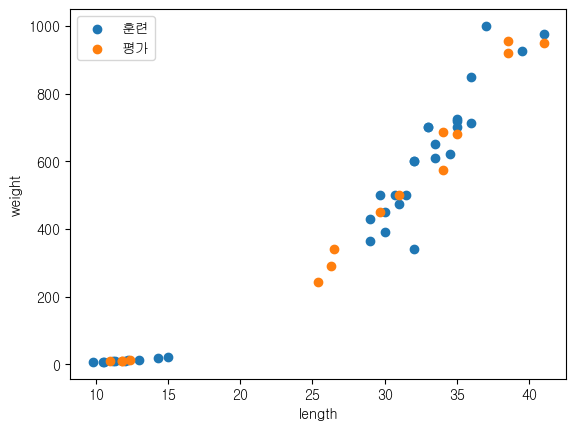

In [41]:
train_input = np.array(train_input)
test_input = np.array(test_input)

#데이터 분포 확인(산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
#           물고기의 길이를 x축에, 물고기의 무게를 y축에...
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()

plt.show()
# 훈련데이터 위치와 평가데이터 위치가 train_test_split() 함수에 의해 고르게 찢어졌음을 확인하는 그래프

In [42]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)
# 잘 찢어놨으므로 1.0 = 100점 나옴! (과적합은 아닌지 의심 필요)

1.0

### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것
StandardScaler, MinMaxScaler 있음

In [56]:
kn = KNeighborsClassifier()

kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [25, 150]
kn.predict([predict_input])

array([0])

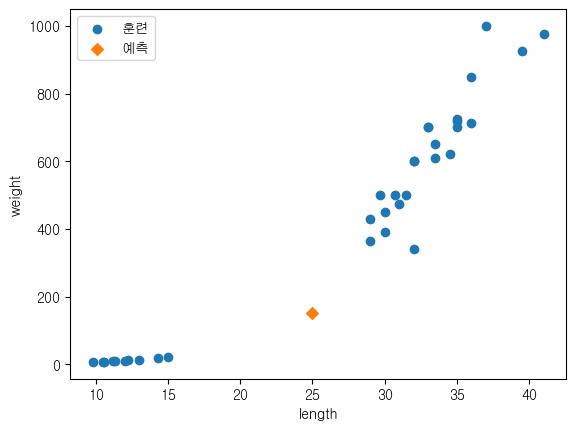

In [57]:
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
#plt.scatter(test__input[:, 0], test__input[:, 1], label='평가')
#           물고기의 길이를 x축에, 물고기의 무게를 y축에...
plt.scatter(predict_input[0], predict_input[1], label='예측', marker='D') #다이아몬드 점

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()

plt.show()
# 빙어라고 예측했는데 도미와 더 가까워보임을 확인하는 그래프
# -> x, y축 단위가 크게 차이나기 때문에!
# 값의 범위 차이가 크면 예측에 차이가 남

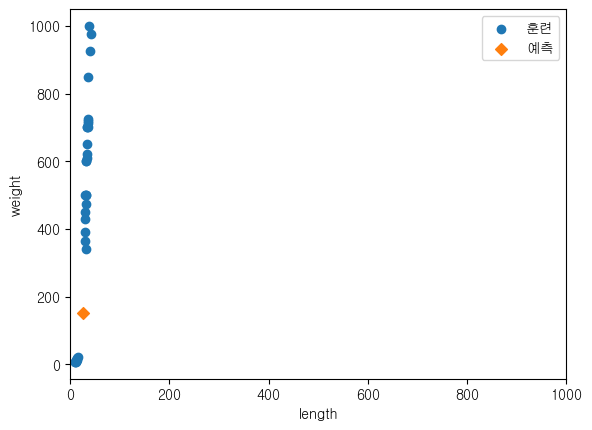

In [58]:
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
#plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
#           물고기의 길이를 x축에, 물고기의 무게를 y축에...
plt.scatter(predict_input[0], predict_input[1], label='예측', marker='D') #다이아몬드 점

plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
# x축의 범위를 y축과 같이 늘려준다면 [25, 150]이 빙어와 더 가까움을 확인할 수 있음
plt.legend()

plt.show()

In [59]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index]
# 근접한 다섯 개 모두 빙어임을 확인. 도미 같은데도... -> x, y축의 단위 차이가 크니까 이런 일이 일어난다!

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

In [60]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std
# 훈련 데이터의 길이·무게의 평균이 mean에. 길이·무게의 표준편차가 std에 저장됨

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [61]:
train_scaled = (train_input-mean) / std
# for문을 돌리지 않아도 각 train_input 요소마다 연산 수행해 저장됨. 
test_scaled = (test_input-mean) / std
# 테스트할 포인트도 train한 평균, 표준편차로 z정규화 해서 테스트
# label은 표준 점수 산출 x

kn.fit(train_scaled, train_label)
kn.score(test_input, test_label)
# fit땐 train_scaled를 넣고 score땐 test_input을 넣으면 거리 차이의 기준이 달라지므로 성능 떨어짐.
# 근데 왜 다 도미라는 판정이 나왔지?

kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)
# 0.1 = 100점

1.0

In [62]:
predict_scaled = (predict_input-mean)/std
predict_scaled

# 훈련, 평가, 예측 데이터 모두 동일한 방식으로 스케일링을 적용해야 함

array([-0.20071491, -0.92604182])

In [64]:
kn.predict([predict_scaled])

array([1])

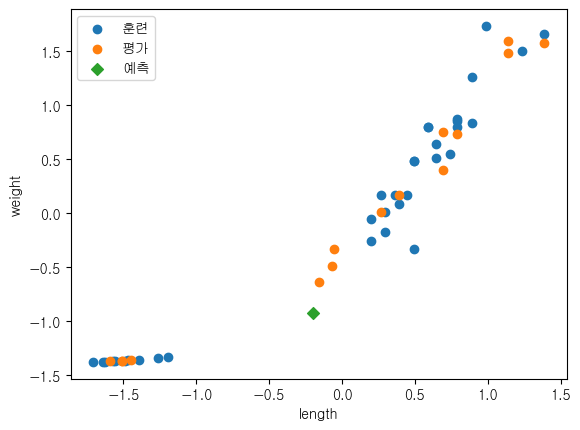

In [65]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측', marker='D') #다이아몬드 점

plt.xlabel('length')
plt.ylabel('weight')

plt.legend()

plt.show()
#predict 정보가 상대적으로 도미와 더 가까움이 시각적으로 확인됨

In [66]:
# StandardScaler
# 평균, 표준편차 구하고 z정규화할 때 쓸 수식을 클래스 객체 불러와 간단히 쓸 것
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

train_scaled = std_scaler.fit_transform(train_input)
# 계산, 변환 한 번에
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

### 이진분류 정리 ###

!!!!!!!!!!!!!!!!!!!!!!!!!!!
머신러닝 파이프라인에 따라 위에서 해본 이진분류를 하나의 코드셀에 정리해보기!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
정리하고 노션에 정리해두면 좋을듯
---

### 생선 다중분류

In [79]:
df = pd.read_csv('./data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [69]:
df['Species'].value_counts()
# 어종별 몇 개 있는지 파악 가능
# Perch:유라시아농어, Roach:로치, Pike:민물꼬치고기, Parkki:참돔, Whitefish:흰물고기


Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [74]:
df['Species'].unique()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [80]:
df[df['Weight']==0] #-> 40번 인덱스가 무게가 0임

df = df.drop(40).reset_index(drop=True) # 이상치 제거
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [123]:
# 데이터 전처리 -> 학습할 수 있는 형태로 가공 필요
# 훈련 데이터의 규격: label(Species칼럼), input(그 외 칼럼) 데이터가 같이 있는 상황
# d는 다중의 d임

dfish_input = df.iloc[:, 1:].to_numpy()
dfish_label = df.iloc[:, 0].to_numpy()
# input과 label을 나눠 저장, 학습에 용이한 형태인 ndarray형으로 바꿈

dfish_input.shape

(158, 5)

In [124]:
# 훈련-테스트 데이터 분리
dtrain_input, dtest_input, dtrain_label, dtest_label = train_test_split(
    dfish_input, dfish_label, test_size=0.1, random_state=0)

In [125]:
# 정규화(z-score)
standard_scaler = StandardScaler()
standard_scaler.fit(dtrain_input) #정규화를 위한 계산만 한 상태
dtrain_scaled = standard_scaler.transform(dtrain_input) #변형

dtest_scaled = standard_scaler.transform(dtest_input)
# test할 데이터도 z정규화. mean, std는 fit할 때 dtrain_input에서 계산해둠.

In [126]:
# 훈련
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(dtrain_scaled, dtrain_label)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [108]:
kn._fit_X
# 모델 내부에 저장된 훈련 데이터들을 불러옴

array([[ 1.97883576,  1.28077618,  1.17218278,  0.93942578,  1.43711616],
       [ 0.45350113,  0.58491523,  0.47631458,  0.33276473,  1.15733506],
       [-0.68489199, -0.48207156, -0.55460127, -0.86877569, -0.44926819],
       [-0.71293123, -0.69546891, -0.66628382, -0.07718521, -0.64218857],
       [-1.07744135, -1.5212239 , -1.53397133, -1.58535932, -1.81192838],
       [ 0.60491302,  0.49213377,  0.65672486,  1.61503589,  0.4279494 ],
       [ 0.29648139,  0.30657085,  0.46772362,  1.16814299, -0.01758265],
       [ 0.29648139,  0.23234568,  0.45054169,  1.27961579,  0.32648585],
       [ 1.57226679,  0.95604107,  1.12063699,  2.1995884 ,  1.10177445],
       [-0.79704895, -0.66763447, -0.72642058, -0.75572881, -0.49057502],
       [-0.29234264, -0.20372718, -0.15082589,  0.00371247,  0.05735144],
       [ 1.55824717,  2.18075633,  2.07423415,  0.01549415,  1.03149465],
       [ 1.69844337,  1.41994837,  1.2924563 ,  0.89263296,  2.17807936],
       [-1.08585312, -1.63256165, -1.6

In [109]:
kn.classes_
# 모델이 학습한 클래스(라벨)의 목록을 나타내는 속성

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [127]:
# 평가
kn.score(dtest_scaled, dtest_label)
# 0.625
#

0.875

### 다중분류 작동 방식
- 다중분류 클래스 값의 크기와 같은 배열 형태로 결과를 도출

In [128]:
#예측
kn.predict(dtest_scaled[5:10])

array(['Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [129]:
dtest_label[5:10]
#예측값과 정답이 하나 틀림

array(['Perch', 'Perch', 'Pike', 'Perch', 'Perch'], dtype=object)

In [131]:
print(kn.classes_)
kn.predict_proba(dtest_scaled[5:10])
# 5~9번 인덱스에 대해, 각 종일 확률을 모두 출력
# Perch와 Pike가 0.429로 같은 확률 가짐. -> Perch라고 판단 (틀림)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.        ,
        0.        , 0.28571429],
       [0.        , 0.        , 0.42857143, 0.42857143, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.14285714,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.28571429,
        0.        , 0.        ]])

In [140]:
distances, index = kn.kneighbors(dtest_scaled[7:8])
distances, index
# 7번 인덱스 데이터와 근접한 데이터포인트 k=7개를 가져옴 (인덱스도 같이 가져옴)

print(distances, index)
print(dtrain_label[index])
# Pike 세 마리, Perch 세 마리 -> 이래서 동률이 나왔다!
# 동률일 때 인덱스가 더 앞에 있는 Perch를 선택함

[[0.91101148 1.22823945 1.54569749 1.58666383 1.59724465 1.68338757
  1.72850434]] [[115 131  73  50  77  84   6]]
[['Pike' 'Pike' 'Perch' 'Perch' 'Pike' 'Perch' 'Whitefish']]
